## step1: load the images

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

def random_image(test_train,yes_no):
  if test_train=='train' and yes_no=='yes':
    path = '/content/drive/MyDrive/brain_tumor_train/train/yes'
    files = os.listdir(path)
    randomFile = random.choice(files)
    print(randomFile)
    image = Image.open(path + '/' + randomFile)  # displayed the image
    plt.imshow(image)
  elif test_train=='train' and yes_no=='no':
    path = '/content/drive/MyDrive/brain_tumor_train/train/no'
    files = os.listdir(path)
    randomFile = random.choice(files)
    print(randomFile)
    image = Image.open(path + '/' + randomFile)  # displayed the image
    plt.imshow(image)
  elif test_train=='test' and yes_no=='yes':
    path = '/content/drive/MyDrive/brain_tumor_train/test/yes'
    files = os.listdir(path)
    randomFile = random.choice(files)
    print(randomFile)
    image = Image.open(path + '/' + randomFile)  # displayed the image
    plt.imshow(image)
  elif test_train=='test' and yes_no=='no':
    path = '/content/drive/MyDrive/brain_tumor_train/test/no'
    files = os.listdir(path)
    randomFile = random.choice(files)
    print(randomFile)
    image = Image.open(path + '/' + randomFile)  # displayed the image
    plt.imshow(image)
  else:
    print("no such file or directory")

Y15.jpg


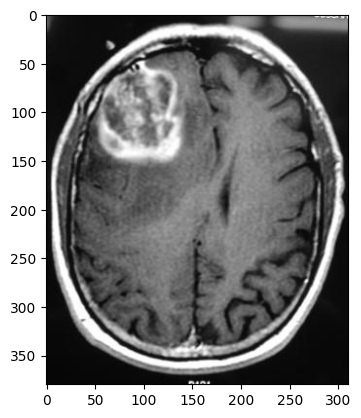

In [3]:
random_image('train','yes')

8 no.jpg


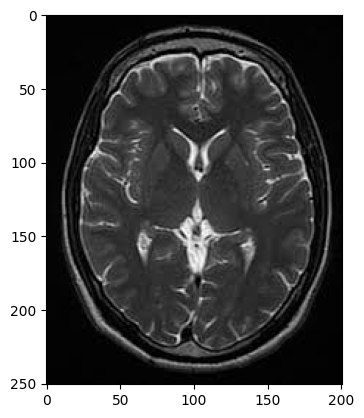

In [4]:
random_image('test','no')

Y247.JPG
no 3.jpg
Y11.jpg
7 no.jpg


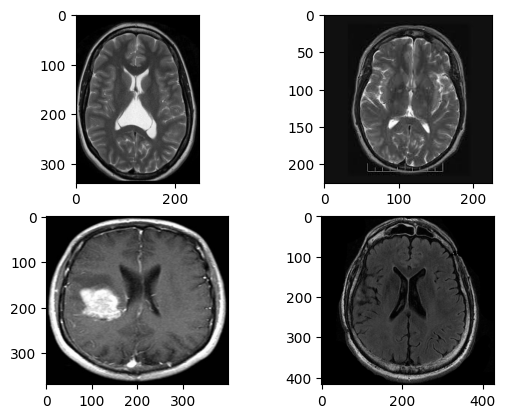

In [6]:
#visualize random images side by side
import matplotlib.pyplot as plt
plt.figure()
plt.subplot(2,2,1)
random_image('train','yes')
plt.subplot(2,2,2)
random_image('train','no')
plt.subplot(2,2,3)
random_image('test','yes')
plt.subplot(2,2,4)
random_image('test','no')

## step2: preprocess the images

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

#normalization of data values to 0 and 1
train_datagen=ImageDataGenerator(rescale=1./255) #divide all the pixel values by 255
valid_datagen=ImageDataGenerator(rescale=1./255) #divide all the pixel values by 255

#setup paths to directories
train_dir="/content/drive/MyDrive/brain_tumor_train/train"
test_dir="/content/drive/MyDrive/brain_tumor_train/test"

#import data from directories
train_data=train_datagen.flow_from_directory(directory=train_dir, #target directory
                                             batch_size=32, #convert the sample to batches
                                             target_size=(227,227), #target size of the images
                                             class_mode="binary", #binary since the classes are yes or no
                                             seed=42) #for randomization
valid_data=valid_datagen.flow_from_directory(directory=test_dir,
                                             batch_size=32,
                                             target_size=(227,227),
                                             class_mode="binary",
                                             seed=42)

#building the CNN
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model_3=tf.keras.models.Sequential()

#first downsampling
model_3.add(Conv2D(filters=96,
                   kernel_size=11,
                   activation="relu",
                   input_shape=(227,227,3),
                   strides=4))
model_3.add(MaxPooling2D(pool_size=3
                         ,padding="valid"
                         ,strides=2))
#second downsampling
model_3.add(Conv2D(filters=16,
                   kernel_size=5,
                   activation="relu",
                   strides=1))
model_3.add(MaxPooling2D(pool_size=3
                         ,padding="valid",
                         strides=2))

#continuous convolution
model_3.add(Conv2D(filters=384,
                   kernel_size=3,
                   activation="relu",
                   strides=1))
model_3.add(Conv2D(filters=384,
                   kernel_size=3,
                   activation="relu",
                   strides=1))
model_3.add(Conv2D(filters=256,
                   kernel_size=3,
                   activation="relu",
                   strides=1))

#downsampling
model_3.add(MaxPooling2D(pool_size=3
                         ,padding="valid",
                         strides=2))
#falttening/dimension reduction
model_3.add(Flatten())

#fully connected layers
model_3.add(Dense(9216,activation="tanh"))
model_3.add(Dense(4096,activation="tanh"))
model_3.add(Dense(4096,activation="tanh"))
model_3.add(Dense(1,activation="sigmoid"))#output binary classification


Found 233 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


## step3: compiling the model

In [12]:
model_3.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

## step4: compile the model

In [13]:
history_2=model_3.fit(train_data,
                     epochs=5,
                     steps_per_epoch=len(train_data),
                     validation_data=valid_data,
                     validation_steps=len(valid_data))

Epoch 1/5
8/8 [==============================] - 54s 7s/step - loss: 1.6781 - accuracy: 0.5193 - val_loss: 1.1217 - val_accuracy: 0.5000
Epoch 2/5
8/8 [==============================] - 24s 3s/step - loss: 0.8070 - accuracy: 0.5494 - val_loss: 1.1887 - val_accuracy: 0.5000
Epoch 3/5
8/8 [==============================] - 23s 3s/step - loss: 0.8141 - accuracy: 0.4850 - val_loss: 0.7642 - val_accuracy: 0.5000
Epoch 4/5
8/8 [==============================] - 27s 3s/step - loss: 0.6721 - accuracy: 0.5494 - val_loss: 0.9148 - val_accuracy: 0.5000
Epoch 5/5
8/8 [==============================] - 24s 3s/step - loss: 0.7087 - accuracy: 0.6223 - val_loss: 0.8876 - val_accuracy: 0.5000


In [14]:
model_3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 27, 27, 96)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 23, 23, 16)        38416     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 11, 11, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 9, 9, 384)         55680     
                                                                 
 conv2d_10 (Conv2D)          (None, 7, 7, 384)        

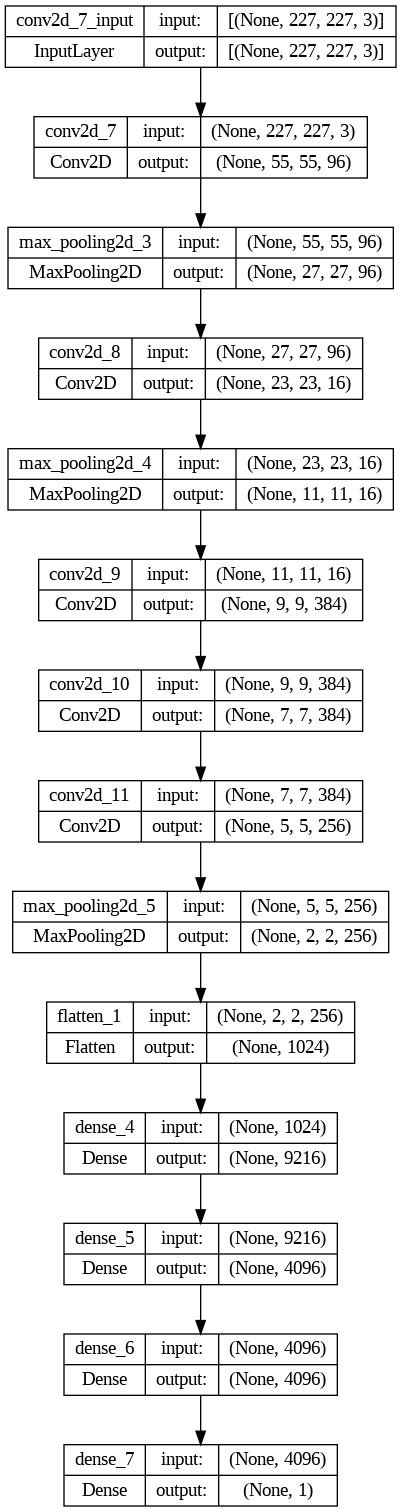

In [15]:
from tensorflow.keras.utils import plot_model
plot_model(model_3, to_file='model_plot2.png', show_shapes=True, show_layer_names=True)